##### **Time Series Forecasting of Stock Market Data with ARIMA in Python**


#### 1. Time Series Data
`Time series` data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include stock prices, temperature readings, website traffic, and sales data. Time series data can be analyzed using various statistical and machine learning techniques, such as regression analysis, ARIMA models, and deep learning models.

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

`Overall,` time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.

- `Time series` data is a sequence of data points collected over time that can be used to analyze trends and patterns. It can be collected from various sources and analyzed using statistical and machine learning techniques. 
- `Time series forecasting` is the process of predicting future values based on past observations. Time series data is used in many different fields, including finance, economics, engineering, and social sciences.

#### **Stock Market Data scraping in Python**

In [2]:
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
date.today()

datetime.date(2025, 4, 8)

In [4]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2024-04-08 2025-04-08


In [5]:
# deifne the ticker
ticker = 'GOOGL'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()

YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-04-08,154.113205,154.531205,151.883858,152.053047,20702000
2024-04-09,155.854858,157.805524,154.451564,155.347275,31113000
2024-04-10,155.397064,155.864829,153.944004,155.466738,22838600
2024-04-11,158.651489,158.920194,155.715529,156.163385,27166400
2024-04-12,156.979507,159.457665,156.392318,157.208424,25329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-04-08 to 2025-04-07
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   251 non-null    float64
 1   (High, GOOGL)    251 non-null    float64
 2   (Low, GOOGL)     251 non-null    float64
 3   (Open, GOOGL)    251 non-null    float64
 4   (Volume, GOOGL)  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [7]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [8]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2024-04-08,154.113205,154.531205,151.883858,152.053047,20702000
1,2024-04-09,155.854858,157.805524,154.451564,155.347275,31113000
2,2024-04-10,155.397064,155.864829,153.944004,155.466738,22838600
3,2024-04-11,158.651489,158.920194,155.715529,156.163385,27166400
4,2024-04-12,156.979507,159.457665,156.392318,157.208424,25329200


In [9]:
df.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,251,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2024-10-05 11:16:58.326693120,172.560662,174.470346,170.742509,172.555882,2.781563e+07
min,2024-04-08 00:00:00,145.600006,150.923014,140.529999,141.550003,1.024210e+07
25%,2024-07-08 12:00:00,163.079247,165.344887,162.055000,163.406446,2.030655e+07
50%,2024-10-04 00:00:00,170.717514,172.792923,168.320007,170.323845,2.429450e+07
75%,2025-01-04 12:00:00,181.347374,183.419346,180.111357,181.875135,3.156970e+07
max,2025-04-07 00:00:00,206.142593,206.811821,202.576693,203.156027,7.679410e+07
std,NaN,12.825128,12.842060,12.715760,12.736505,1.162041e+07


In [10]:
# select columns
df = df[['Date', 'Close']]
df.head()

Price,Date,Close
Ticker,,GOOGL
0,2024-04-08,154.113205
1,2024-04-09,155.854858
2,2024-04-10,155.397064
3,2024-04-11,158.651489
4,2024-04-12,156.979507


#

In [11]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -1.774448
p-value: 0.393219
Fail to reject the null hypothesis. Data is not stationary


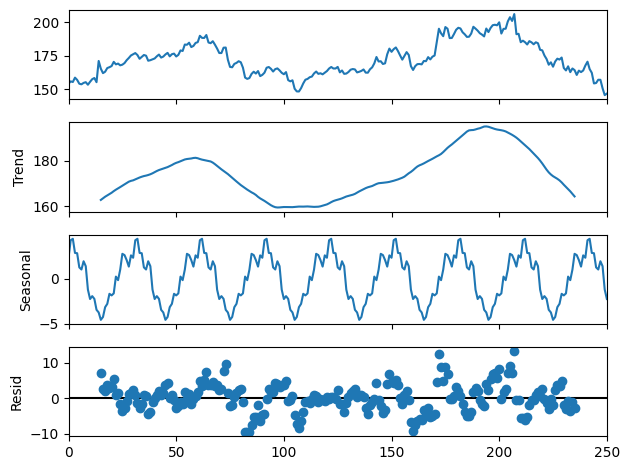

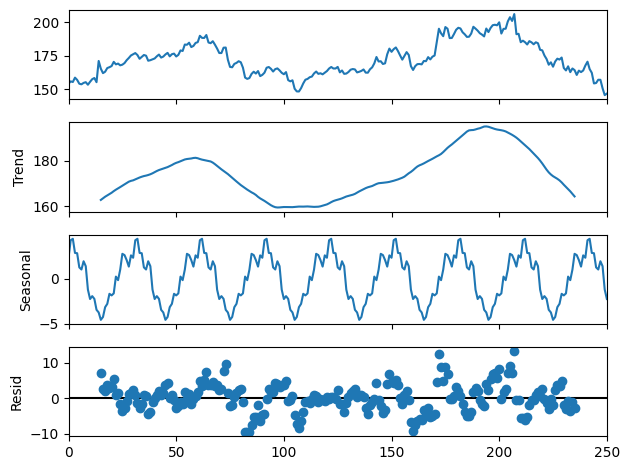

In [12]:
# decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()

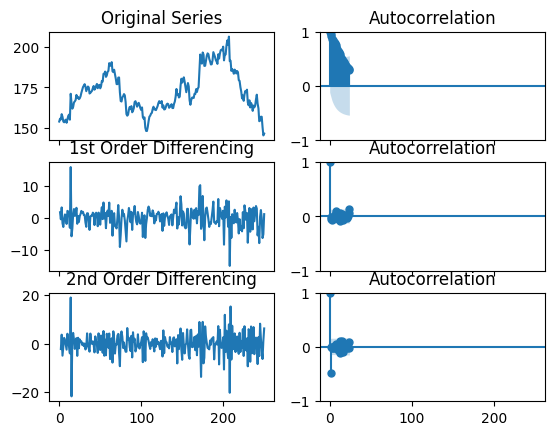

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

# Lets find `p` value

In [14]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.955629
2   0.911543
3   0.873154
4   0.844371
5   0.817712
6   0.787335
7   0.754810
8   0.721759
9   0.686764
10  0.651375
11  0.617975
12  0.584245
13  0.555389
14  0.521669
15  0.495585
16  0.466070
17  0.440537
18  0.413461
19  0.389040
20  0.364116
21  0.341728
22  0.327487
23  0.310647


`p = 2`

# Lets find `q` value

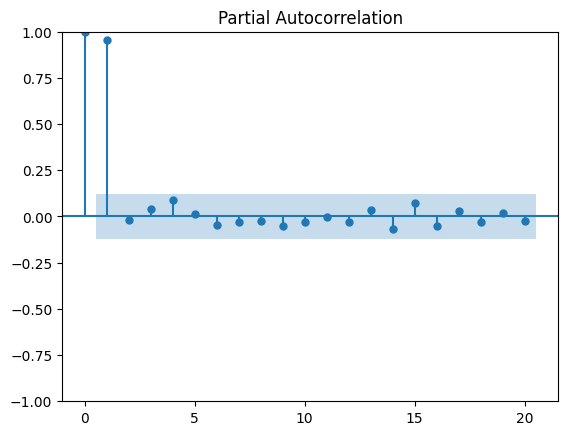

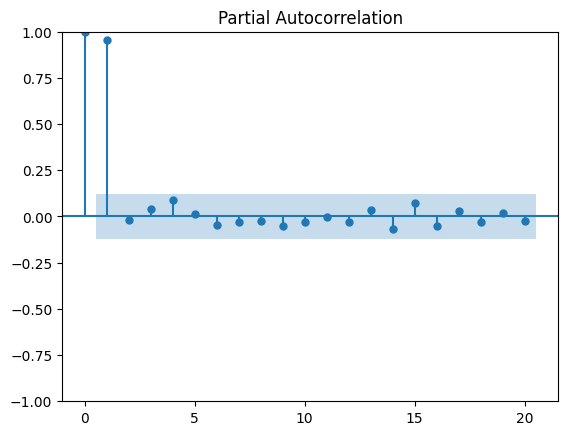

In [15]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [16]:
# lets define p, d, q
p = 2
d = 1
q = 2

In [17]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1423.865, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1313.523, Time=0.16 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1425.553, Time=0.04 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1299.054, Time=0.37 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.57 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1297.547, Time=0.35 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1312.595, Time=0.28 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.31 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.73 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1299.015, Time=0.45 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1299.825, Time=1.32 sec


c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1298.971, Time=1.34 sec

Best model:  ARIMA(0,1,0)(2,1,0)[12]          
Total fit time: 15.743 seconds


In [18]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  251
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -645.773
Date:                            Tue, 08 Apr 2025   AIC                           1297.547
Time:                                    17:37:27   BIC                           1307.963
Sample:                                         0   HQIC                          1301.745
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.8053      0.055    -14.539      0.000      -0.914      -0.697
ar.S.L24      -0.2768      0.046   

In [19]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\conda_envs\forecasting\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\co

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -649.496
Date:                Tue, 08 Apr 2025   AIC                           1300.991
Time:                        17:37:29   BIC                           1304.513
Sample:                             0   HQIC                          1302.408
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        10.5707      0.551     19.197      0.000       9.491      11.650
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               158.56
Prob(Q):                              0.95   Pr

c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


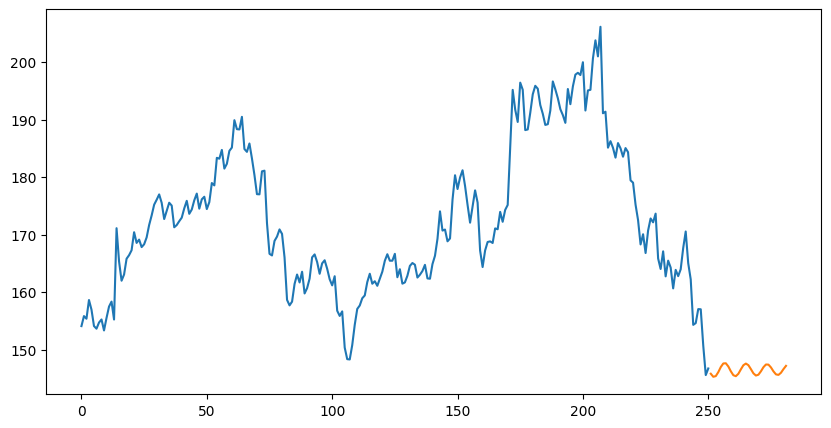

In [20]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [21]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              GOOGL   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -630.045
Date:                            Tue, 08 Apr 2025   AIC                           1278.090
Time:                                    17:37:38   BIC                           1309.340
Sample:                                         0   HQIC                          1290.684
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4599      0.033     44.369      0.000       1.395       1.524
ar.L2         -0.9839      0.035   

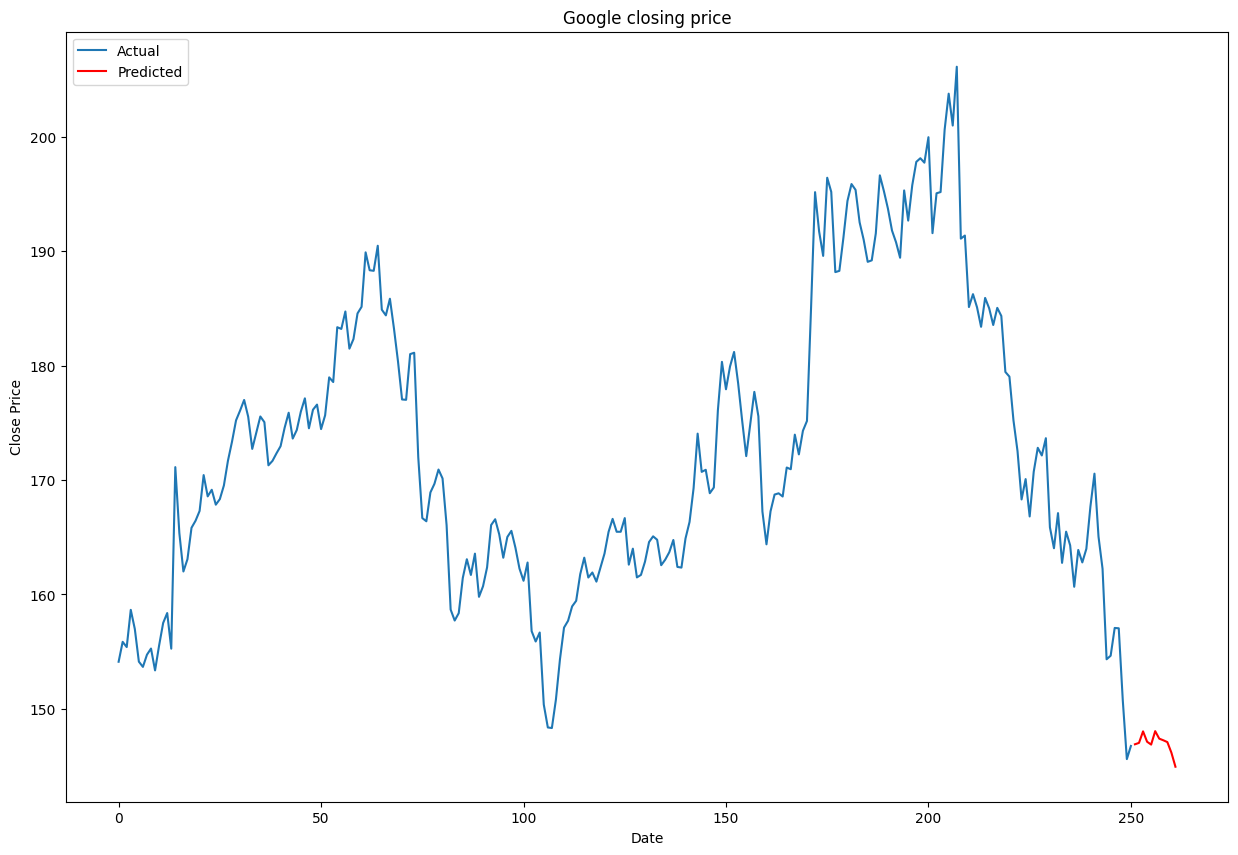

In [22]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


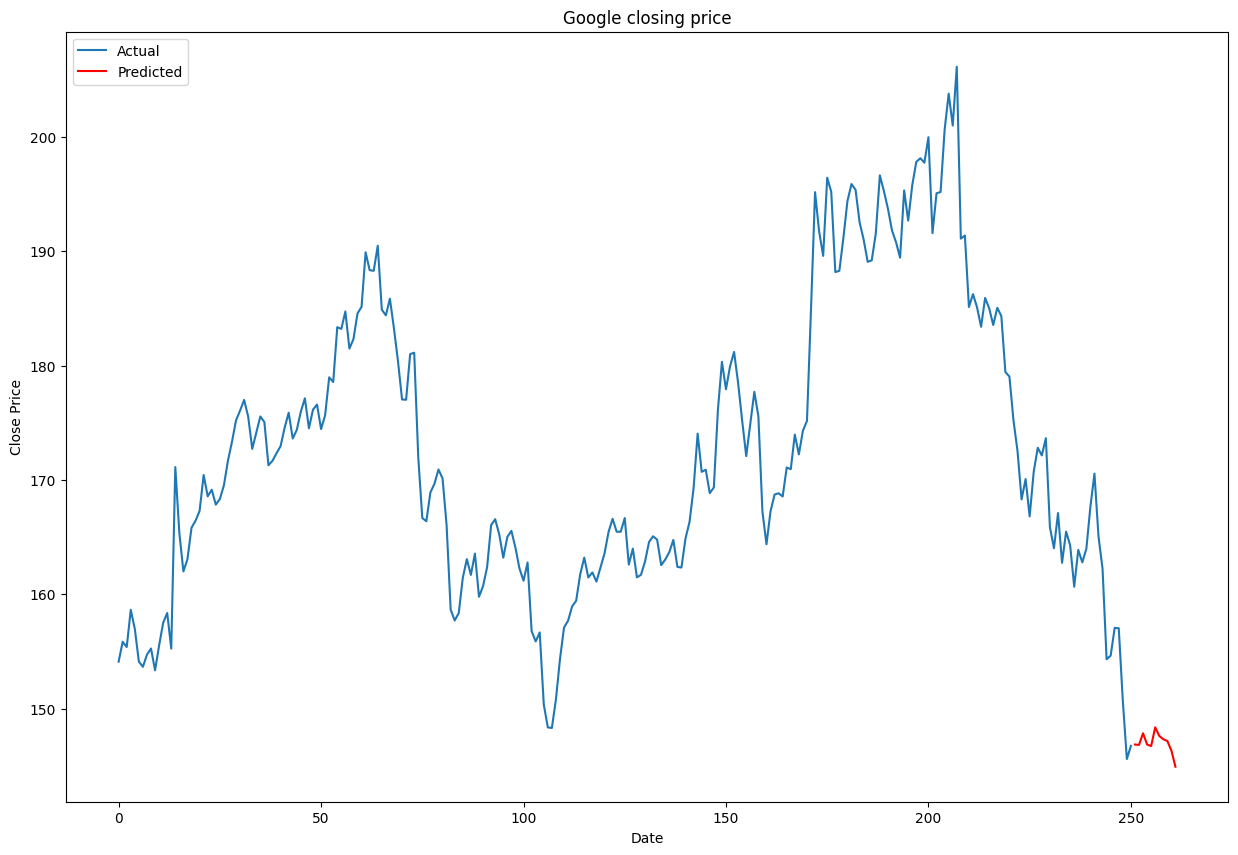

In [23]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

# hyper paramter tuning

c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\conda_envs\forecasting\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: M

Best SARIMA(0, 1, 1)x(0, 1, 1, 12)12 model - AIC:1185.9680205453105


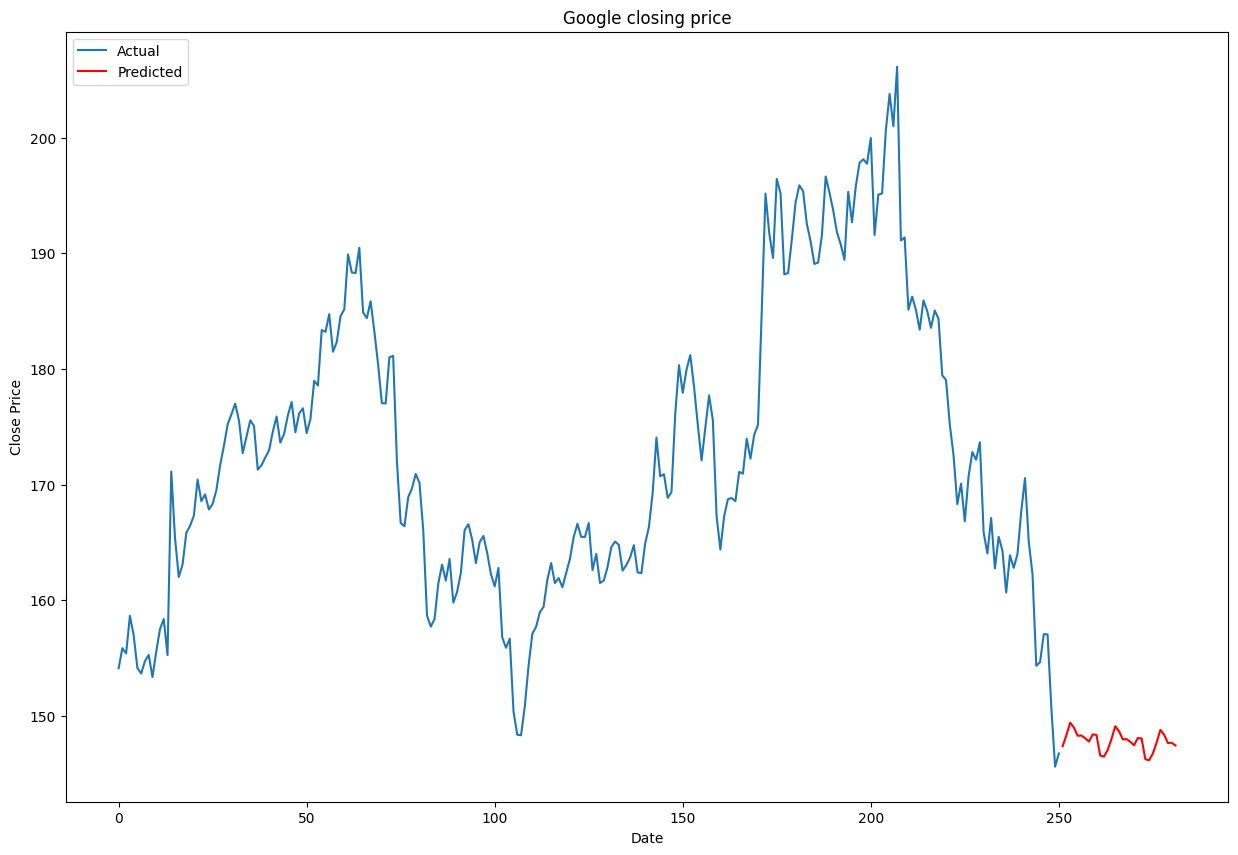

In [24]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Assume you have a DataFrame 'df' with your time series data in a column named 'value'
# Assume that the seasonal period of your time series data is 12 (e.g., monthly data)

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d, q and m quadruplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = SARIMAX(df['Close'],
                                 order = param,
                                 seasonal_order = param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMA{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

# predict next 30 days
model = SARIMAX(df['Close'],
                order = best_pdq,
                seasonal_order = best_seasonal_pdq,
                enforce_stationarity=False,
                enforce_invertibility=False)
model = model.fit()
predictions = model.predict(len(df['Close']), len(df['Close'])+30)
# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              GOOGL   No. Observations:                  251
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -589.984
Date:                            Tue, 08 Apr 2025   AIC                           1185.968
Time:                                    17:38:19   BIC                           1196.203
Sample:                                         0   HQIC                          1190.099
                                            - 251                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0277      0.060      0.459      0.646      -0.090       0.146
ma.S.L12      -1.0045      1.129     -0.890      0.373      -3.217       1.208
sigma2         9.9923     11.528      0.867      0.386     -12.601      32.586
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                96.80
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                            -0.65
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""